# Example: Successive halving
-----------------------------

This example shows how to compare multiple tree-based models using successive halving.

Import the california housing dataset from [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html).
 This is a small and easy to train dataset whose goal is to predict house prices.

## Load the data

In [1]:
from sklearn.datasets import fetch_california_housing
from atom import ATOMRegressor

In [2]:
# Load the data
X, y = fetch_california_housing(return_X_y=True)

## Run the pipeline

In [3]:
atom = ATOMRegressor(X, y, verbose=2, random_state=1)

<< ================== ATOM ================== >>
Algorithm task: regression.

Dataset stats ==================== >>
Shape: (20640, 9)
Memory: 1.49 MB
Scaled: False
Outlier values: 786 (0.5%)
-------------------------------------
Train set size: 16512
Test set size: 4128



In [4]:
# Compare tree-based models via successive halving
atom.successive_halving(
    models=["Tree", "Bag", "ET", "RF", "LGB", "CatB"],
    metric="mae",
    n_bootstrap=5,
)


Training ========================= >>
Metric: neg_mean_absolute_error


Run: 0 =========================== >>
Models: Tree6, Bag6, ET6, RF6, LGB6, CatB6
Size of training set: 16512 (17%)
Size of test set: 4128


Results for DecisionTree:
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.0
Test evaluation --> neg_mean_absolute_error: -0.5538
Time elapsed: 0.036s
Bootstrap ---------------------------------------
Evaluation --> neg_mean_absolute_error: -0.5542 ± 0.0284
Time elapsed: 0.321s
-------------------------------------------------
Total time: 0.357s


Results for Bagging:
Fit ---------------------------------------------
Train evaluation --> neg_mean_absolute_error: -0.1648
Test evaluation --> neg_mean_absolute_error: -0.42
Time elapsed: 0.146s
Bootstrap ---------------------------------------
Evaluation --> neg_mean_absolute_error: -0.4289 ± 0.0055
Time elapsed: 0.831s
-------------------------------------------------
Total time: 

## Analyze the results

In [5]:
# The results is now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the number of models fitted during that run
atom.results

score_train  score_test  time_fit  score_bootstrap  \
frac model                                                       
0.17 Bag6       -0.1648     -0.4200  0.146132        -0.428947   
     CatB6      -0.1591     -0.3433  4.810551        -0.348576   
     ET6        -0.0000     -0.3958  0.786993        -0.401530   
     LGB6       -0.2022     -0.3599  0.361332        -0.360678   
     RF6        -0.1450     -0.4003  1.320198        -0.405193   
     Tree6      -0.0000     -0.5538  0.036031        -0.554181   
0.33 CatB3      -0.1876     -0.3176  4.777847        -0.329575   
     ET3        -0.0000     -0.3691  1.399291        -0.382764   
     LGB3       -0.2367     -0.3342  0.366333        -0.345083   
1.00 CatB1      -0.2229     -0.2986  7.225810        -0.309112   

            time_bootstrap       time  
frac model                             
0.17 Bag6         0.830754   0.976886  
     CatB6       21.199617  26.010168  
     ET6          3.544431   4.331424  
     LGB6         0.847782   1.209114  
     RF6          6.386311   7.706509  
     Tree6        0.321293   0.357324  
0.33 CatB3       23.359312  28.137159  
     ET3          5.967419   7.366710  
     LGB3         0.969394   1.335727  
1.00 CatB1       35.043598  42.269408

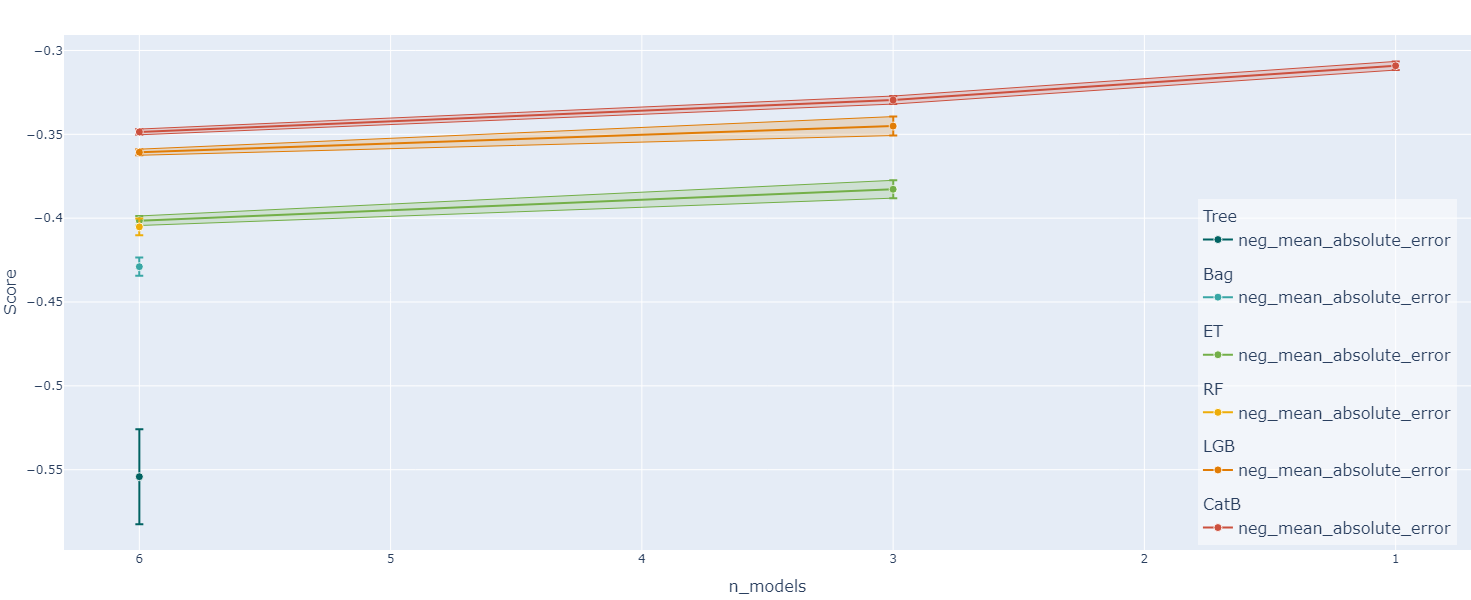

In [6]:
# Plot the successive halving's results
atom.plot_successive_halving()

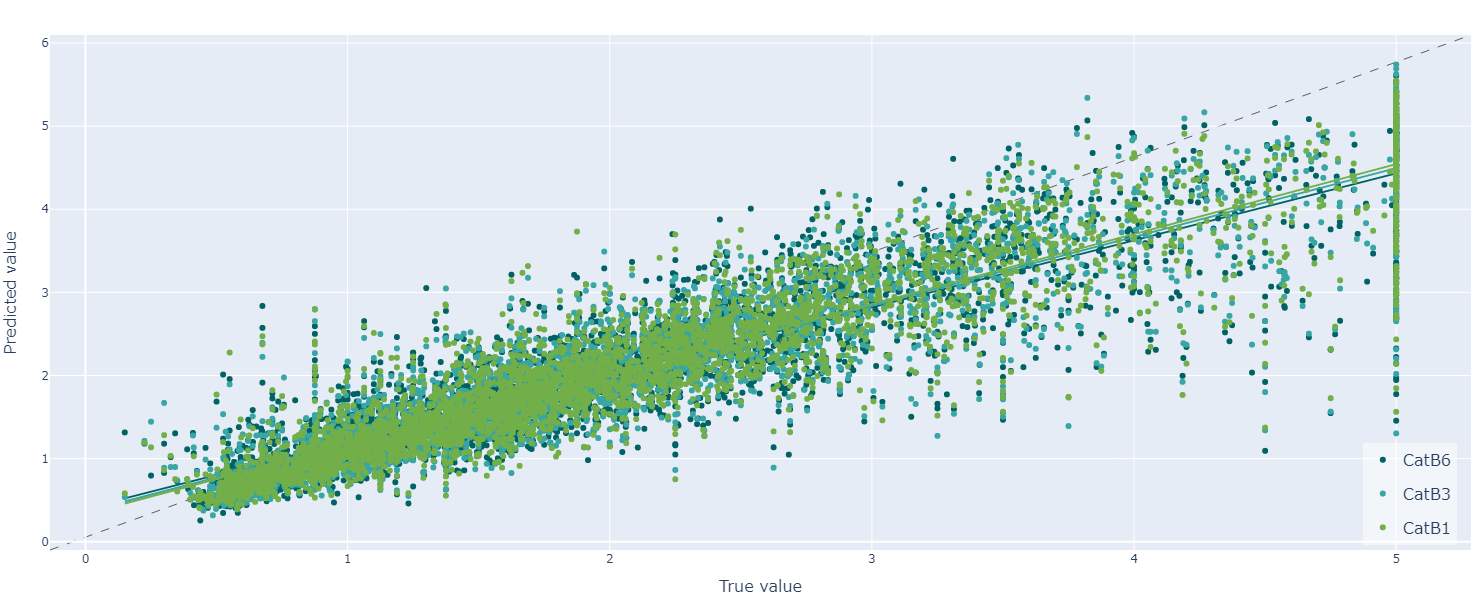

In [9]:
# Use regex to call all the models with the same estimator...
atom.plot_errors(models=["CatB.*"])

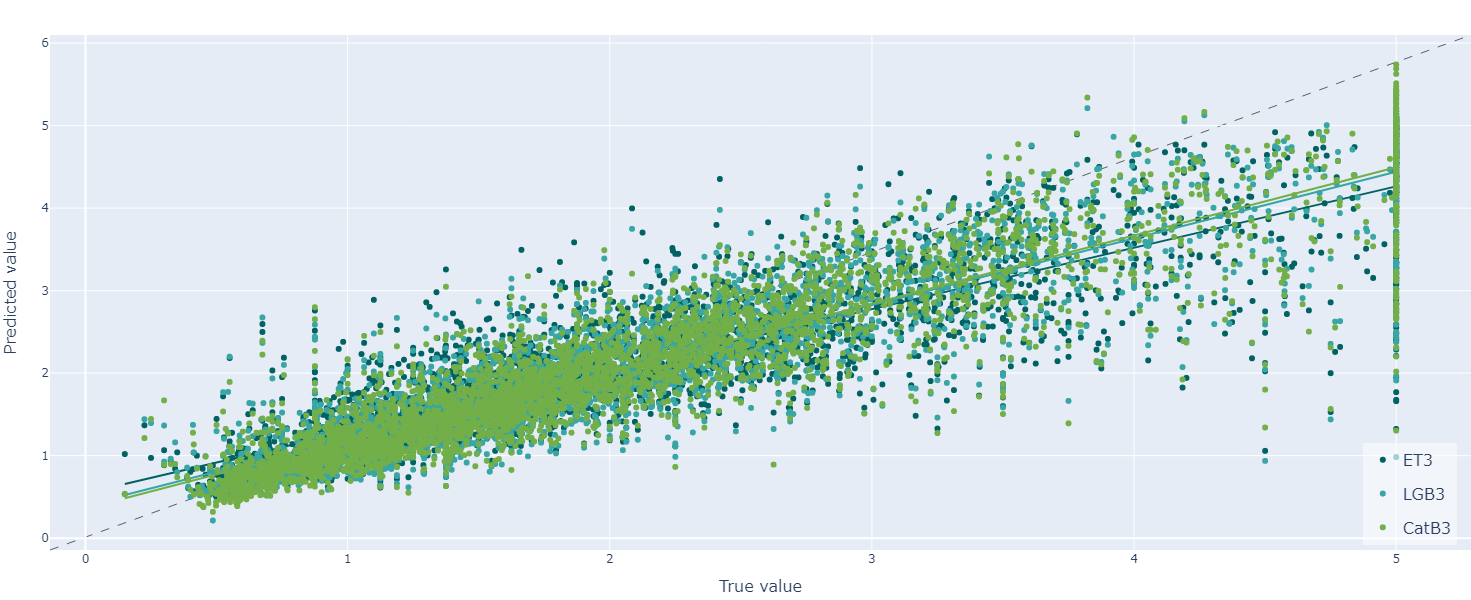

In [10]:
# ...or to call the models from the same run
atom.plot_errors(models=".*3")